## REPS Count Data Prep

In [32]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Spry/"

!wgte https://raw.githubusercontent.com/aryanvij02/PushUpCounter/main/PoseModule.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: wgte: command not found


In [33]:
import pandas as pd
import json, glob, os
from tqdm.auto import tqdm

ground = []
length_json=[]
for name in glob.glob(path+'data/*.json'):
    length_json.append(name)

for i in tqdm(length_json):
    f = open(i)
    data = json.load(f)
    ground.append((i, round(pd.DataFrame(data['images'])['rep_count'].max() )))

df_train = pd.DataFrame(ground, columns = ['data', 'reps_count'])
df_train.to_csv("reps_count.csv", index=False)

  0%|          | 0/33 [00:00<?, ?it/s]

### Convert Video to Images

In [34]:
import cv2

def convert_video2img(video_path, save_image_path):
    vidcap = cv2.VideoCapture(video_path)
    success,image = vidcap.read()
    count = 0
    while success:
        cv2.imwrite(f"{save_image_path}/frame%d.jpg" % count, image)
        success,image = vidcap.read()
        count += 1

In [35]:
for file in tqdm(glob.glob(path+'data/*.mp4')):
    name = os.path.basename(file).replace('.mp4', '')
    save_path = f"img/{name}/"
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    convert_video2img(file, save_path)

  0%|          | 0/100 [00:00<?, ?it/s]

In [36]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
mp_pose = mp.solutions.pose
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                        min_tracking_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

In [38]:
def detectPose(image_pose, pose):
    original_image = image_pose.copy()
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    resultant = pose.process(image_in_RGB)
    if resultant.pose_landmarks:    
        mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                              thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                              thickness=2, circle_radius=2))
    return original_image, results

  0%|          | 0/50 [00:00<?, ?it/s]

/content/drive/MyDrive/Colab Notebooks/Spry/data/000018.mp4 5
/content/drive/MyDrive/Colab Notebooks/Spry/data/000028.mp4 8
/content/drive/MyDrive/Colab Notebooks/Spry/data/000032.mp4 7
/content/drive/MyDrive/Colab Notebooks/Spry/data/000029.mp4 7
/content/drive/MyDrive/Colab Notebooks/Spry/data/000016.mp4 12
/content/drive/MyDrive/Colab Notebooks/Spry/data/000003.mp4 10
/content/drive/MyDrive/Colab Notebooks/Spry/data/000011.mp4 7
/content/drive/MyDrive/Colab Notebooks/Spry/data/000024.mp4 11
/content/drive/MyDrive/Colab Notebooks/Spry/data/000027.mp4 11
/content/drive/MyDrive/Colab Notebooks/Spry/data/000002.mp4 15
/content/drive/MyDrive/Colab Notebooks/Spry/data/000060.mp4 20
/content/drive/MyDrive/Colab Notebooks/Spry/data/000088.mp4 11
/content/drive/MyDrive/Colab Notebooks/Spry/data/000035.mp4 5
/content/drive/MyDrive/Colab Notebooks/Spry/data/000038.mp4 12
/content/drive/MyDrive/Colab Notebooks/Spry/data/000099.mp4 10
/content/drive/MyDrive/Colab Notebooks/Spry/data/000046.mp4 1

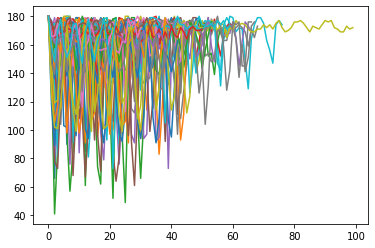

In [39]:
import PoseModule as pm
import numpy as np

reps = {}

for file in tqdm(glob.glob(path+'data/*.mp4')[50:]):
    cap = cv2.VideoCapture(file)
    counter = 0
    detector = pm.poseDetector()

    angles = [180]
    while cap.isOpened():
        ret, img = cap.read() #640 x 480

        if img is None: break
        
        img = detector.findPose(img, False)
        lmList = detector.findPosition(img, False)
        # print(lmList)
        if len(lmList) != 0:
            angle = detector.findAngle(img, 23, 25, 27)

            angles.append(int(angle))

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    angles = [angles[i] for i in range(len(angles)) if i % 10 == 0]
    plt.plot(angles)

    for i in range(1, len(angles)):
        if angles[i] < angles[i-1]:
            switch = True
        else:
            if switch:
                counter += 1
                switch = False

    print(file, counter)
    reps.update({file:counter})  


    #break      
    cap.release()
    cv2.destroyAllWindows()

In [40]:
repsd = {k.replace("mp4", "json") : v for k, v in reps.items()}
repsd

{'/content/drive/MyDrive/Colab Notebooks/Spry/data/000002.json': 15,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000003.json': 10,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000005.json': 13,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000006.json': 10,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000011.json': 7,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000015.json': 19,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000016.json': 12,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000017.json': 5,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000018.json': 5,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000019.json': 6,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000020.json': 9,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000024.json': 11,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000025.json': 6,
 '/content/drive/MyDrive/Colab Notebooks/Spry/data/000027.json': 11,
 '/content/drive/MyDrive/Colab Notebooks

In [41]:
import pandas as pd
repsdf = pd.DataFrame(repsd.items(), columns=["data", "predicted_count"])
repsdf

,data,predicted_count
0,/content/drive/MyDrive/Colab Notebooks/Spry/da...,5
1,/content/drive/MyDrive/Colab Notebooks/Spry/da...,8
2,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7
3,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7
4,/content/drive/MyDrive/Colab Notebooks/Spry/da...,12
5,/content/drive/MyDrive/Colab Notebooks/Spry/da...,10
6,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7
7,/content/drive/MyDrive/Colab Notebooks/Spry/da...,11
8,/content/drive/MyDrive/Colab Notebooks/Spry/da...,11
9,/content/drive/MyDrive/Colab Notebooks/Spry/da...,15


In [ ]:
repsdf.to_csv("repsdf.csv", index=False)

In [ ]:
ground_truth = pd.read_csv("reps_count.csv")
ground_truth

In [ ]:
ground_truth.dtypes

In [ ]:
repsdf.dtypes

In [43]:
result = result.merge(repsdf, how='left', on='data')

In [44]:
result

,data,reps_count,predicted_count_x,predicted_count_y
0,/content/drive/MyDrive/Colab Notebooks/Spry/da...,6,NaN,12.0
1,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7,NaN,14.0
2,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7,NaN,9.0
3,/content/drive/MyDrive/Colab Notebooks/Spry/da...,8,NaN,8.0
4,/content/drive/MyDrive/Colab Notebooks/Spry/da...,6,NaN,6.0
5,/content/drive/MyDrive/Colab Notebooks/Spry/da...,10,NaN,10.0
6,/content/drive/MyDrive/Colab Notebooks/Spry/da...,8,10.0,NaN
7,/content/drive/MyDrive/Colab Notebooks/Spry/da...,9,NaN,11.0
8,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7,NaN,20.0
9,/content/drive/MyDrive/Colab Notebooks/Spry/da...,5,NaN,5.0


In [48]:
result['predicted_count_x'].update(result.pop('predicted_count_y'))

In [49]:
result

,data,reps_count,predicted_count_x,predicted_count
0,/content/drive/MyDrive/Colab Notebooks/Spry/da...,6,12.0,NaN
1,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7,14.0,NaN
2,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7,9.0,NaN
3,/content/drive/MyDrive/Colab Notebooks/Spry/da...,8,8.0,NaN
4,/content/drive/MyDrive/Colab Notebooks/Spry/da...,6,6.0,NaN
5,/content/drive/MyDrive/Colab Notebooks/Spry/da...,10,10.0,NaN
6,/content/drive/MyDrive/Colab Notebooks/Spry/da...,8,10.0,NaN
7,/content/drive/MyDrive/Colab Notebooks/Spry/da...,9,11.0,NaN
8,/content/drive/MyDrive/Colab Notebooks/Spry/da...,7,20.0,NaN
9,/content/drive/MyDrive/Colab Notebooks/Spry/da...,5,5.0,NaN


In [50]:
result.to_csv("result.csv")